/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

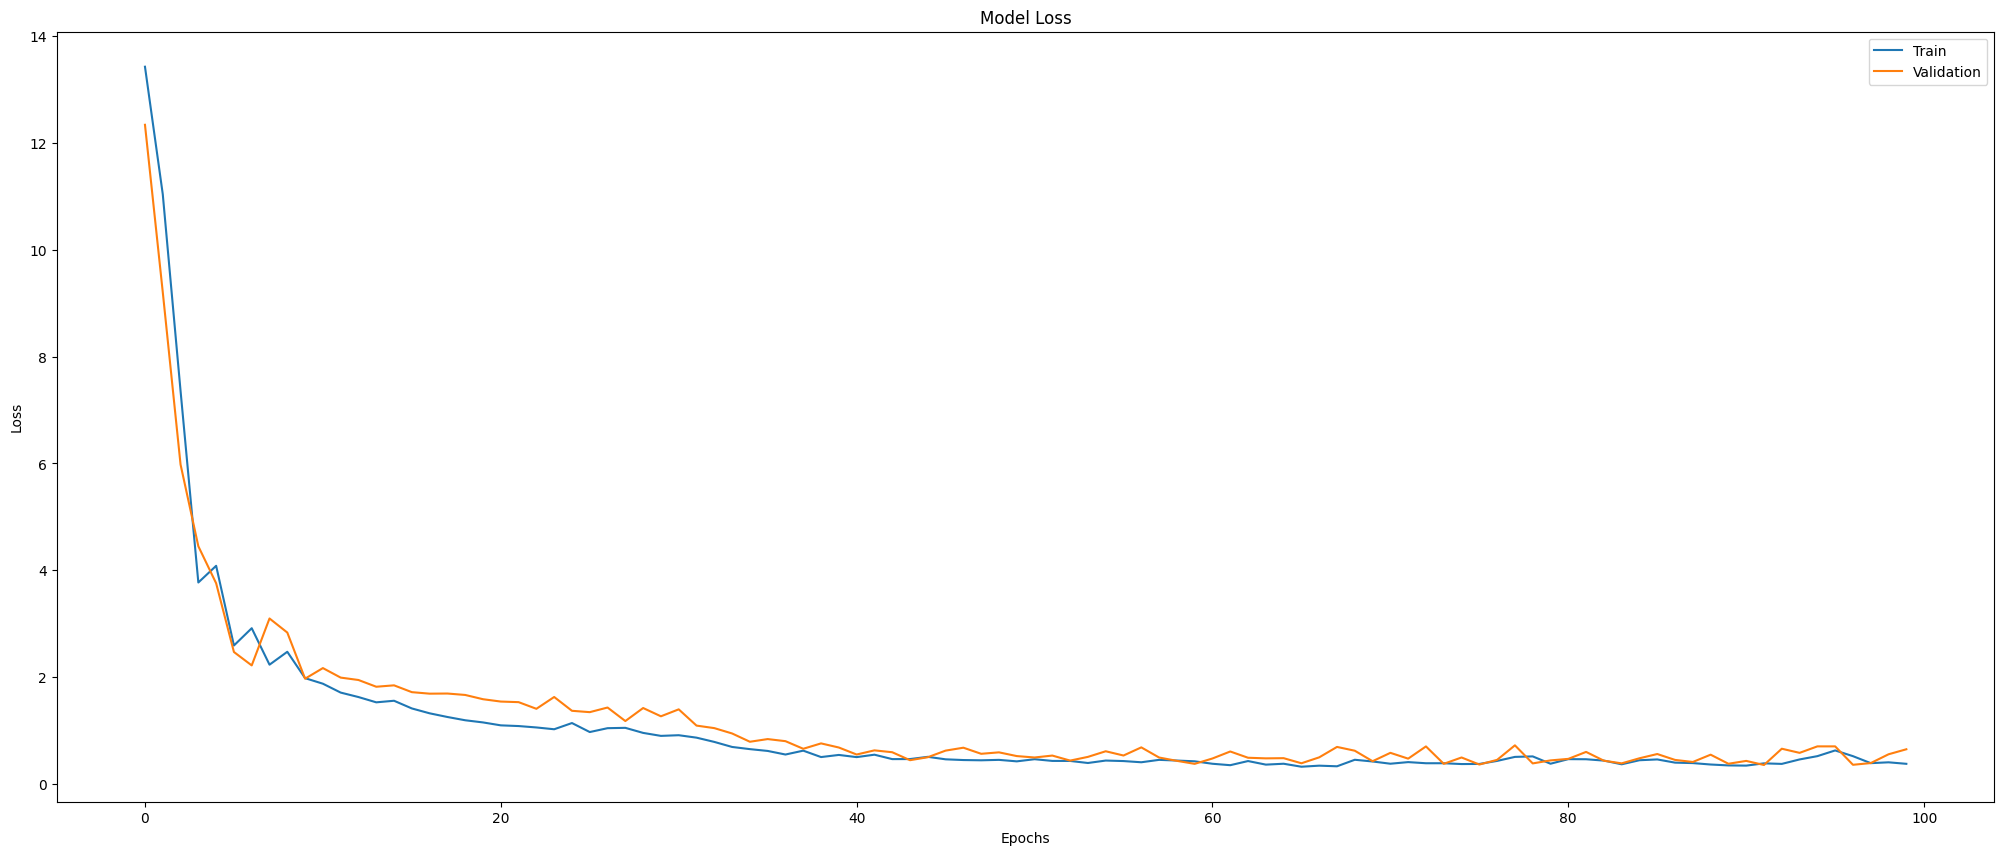

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam



veri=pd.read_csv("/content/Advertising.csv")

y=veri["Sales"]
x=veri.drop(columns="Sales")

sc=StandardScaler()
x=sc.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.1, random_state=0)


def modelkur(units=64, activation="linear", learning_rate=0.01):

  model=Sequential()
  model.add(Dense(units=units, input_dim=x_train.shape[1], activation=activation))
  model.add(Dense(32, activation=activation))
  model.add(Dense(1, activation=activation))
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss="mae", metrics=["mae"])
  return model


parametreler={
    "model__units":[16,32,64],
    "model__activation":["linear", "relu"],
    "model__learning_rate":[0.001,0.01],
    "epochs":[20,50,100]
}

regres=KerasRegressor(model=modelkur, verbose=0)

grid=GridSearchCV(estimator=regres, param_grid=parametreler, cv=5)
gridsonuc=grid.fit(x_train, y_train)


bestparam=gridsonuc.best_params_
bestmodel=modelkur(units=bestparam["model__units"], activation=bestparam["model__activation"], learning_rate=bestparam["model__learning_rate"])


output=bestmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=bestparam["epochs"], verbose=0)

plt.figure(figsize=(25,10))
plt.plot(output.history["loss"])
plt.plot(output.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [4]:
print(gridsonuc.best_params_)
print(gridsonuc.best_score_)


{'epochs': 100, 'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__units': 64}
0.967153685527913


In [5]:
!pip install scikeras --upgrade
!pip install scikit-learn --upgrade
!pip install keras --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 122.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.5 MB/s eta 0:00:00
^C
